In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

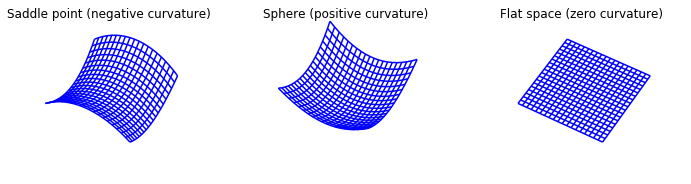

In [30]:
fig = plt.figure(figsize=(12,3))
def plot_func(i, fun, name, caption):
    x = np.linspace(-1,1,20)
    y = np.linspace(-1,1,20)
    X, Y = np.meshgrid(x, y)
    z = fun(X,Y)

    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.plot_wireframe(X,Y,z,color='b')
    ax.view_init(70, 30)
    ax.set_title(caption)
    ax.set_axis_off()
    #plt.axis('off')

plot_func(1, lambda x,y: X ** 2 - Y ** 2, 'saddle.pdf', 'Saddle point (negative curvature)')
plot_func(2, lambda x,y: X ** 2 + Y ** 2, 'sphere.pdf', 'Sphere (positive curvature)')
plot_func(3, lambda x,y: 0, 'flat.pdf', 'Flat space (zero curvature)')
plt.savefig('saddle.pdf', bbox_inches='tight')
